In [1]:
## Team12 - Skids and Mudflap ##

# importing packages
import pandas as pd             # data science essentials
import numpy as np              # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           #  data visualization
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats

# specifying a file (must be in the working directory)
file = "WDIW.xlsx"

# reading the file into Python through pandas
world = pd.read_excel(file, index_col ="Country Code")

# showing data for only Skids & Mudflap
sandm = world.loc[ : , : ][world['Cool Name'] == 'Skids & Mudflap']

# the following code makes the new DataFrame independent
sandm_drop = pd.DataFrame.copy(sandm)

# remove all null columns
sandm_drop.dropna(axis = 1, how ='all', inplace = True) 

print(sandm_drop.shape)

# flag null data with a loop
#for col in sandm_drop:
#        if sandm_drop[col].isnull().astype(int).sum() > 0:
#        sandm_drop['m_'+col] = sandm_drop[col].isnull().astype(int)

# check null data in %
print((sandm_drop.isnull().sum()/22*100).round(2))


(22, 54)
Country Name                                                                                                   0.00
Counter                                                                                                        0.00
Hult Region                                                                                                    0.00
Cool Name                                                                                                      0.00
Access to electricity (% of population)                                                                        0.00
Access to electricity, rural (% of rural population)                                                           0.00
Access to electricity, urban (% of urban population)                                                           0.00
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                 13.64
Age dependency ratio (% of working-age population)             

In [2]:
# separate by sub-region
nordic = sandm_drop.loc[['FIN','NOR','SWE']]
medit = sandm_drop.loc[['AND','GRC','MLT','SMR']]
slavic = sandm_drop.loc[['ALB','BIH','HRV','CZE','EST','HUN','XKX','LVA','LTU','MKD','MNE','POL','SRB','SVK','SVN']]
nonordic = sandm_drop.loc[['ALB','BIH','HRV','CZE','EST','HUN','XKX','LVA','LTU','MKD','MNE','POL','SRB','SVK','SVN','AND','GRC','MLT','SMR']]
micro = sandm_drop.loc[['SMR','MLT','AND']]

In [3]:
# Flagging missing values
for col in sandm_drop:
    
    if sandm_drop[col].isnull().astype(int).sum() > 0:
        sandm_drop['m_'+col] = sandm_drop[col].isnull().astype(int)


In [4]:
Economy = ['Agriculture, forestry, and fishing, value added (% of GDP)',
          'GDP (current US$)',
          'GDP growth (annual %)',
          'Industry (including construction), value added (% of GDP)',
          'Merchandise trade (% of GDP)',
          'Services, value added (% of GDP)',
          'Tax revenue (% of GDP)',
          'Age dependency ratio (% of working-age population)',
          'Age dependency ratio, old (% of working-age population)',
          'Age dependency ratio, young (% of working-age population)',
          'Mobile cellular subscriptions (per 100 people)'
          ]

Employment = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)' 
]

Military = [
    'Armed forces personnel (% of total labor force)',
    'Military expenditure (% of GDP)'
]

Health = [
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure', 
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Prevalence of undernourishment (% of population)' 
]

Surface_Area = ['Surface area (sq.km)']

Population = [
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Population ages 65 and above (% of total population)',
    'Population density (people per sq. km of land area)',
    'Population growth (annual %)',
    'Population in the largest city (% of urban population)',
    'Population living in slums (% of urban population)',
    'Population, female',
    'Population, male', 
    'Population, total',
    'Rural population (% of total population)', 
    'Urban population (% of total population)',
    'Urban population growth (annual %)'
]

Filled = [
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Industry (including construction), value added (% of GDP)',
    'Merchandise trade (% of GDP)',
    'Services, value added (% of GDP)',
    'Tax revenue (% of GDP)',
    'Age dependency ratio (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)',
    'Age dependency ratio, young (% of working-age population)',
    'Mobile cellular subscriptions (per 100 people)',
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Population ages 65 and above (% of total population)',
    'Population density (people per sq. km of land area)',
    'Population growth (annual %)',
    'Population in the largest city (% of urban population)',
    'Population living in slums (% of urban population)',
    'Population, female',
    'Population, male', 
    'Population, total',
    'Rural population (% of total population)', 
    'Urban population (% of total population)',
    'Urban population growth (annual %)'
]

In [5]:
Interest = [
    'Life expectancy at birth, total (years)',
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)',
    'Age dependency ratio (% of working-age population)',
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Population ages 65 and above (% of total population)',
    'Population growth (annual %)',
    'Population, total',
    'Urban population growth (annual %)'
]

Subinterest1 = [
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)',
    'Population growth (annual %)',
    'Urban population growth (annual %)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)'
]

In [ ]:
# slicing column to check Null data
sandm_drop[Population]

In [6]:
# fill actual data found from research
sandm_drop.loc['AND','Population, female'] = (sandm_drop.loc['AND','Population, total']/2).round(0)
sandm_drop.loc['XKX','Population, female'] = (sandm_drop.loc['XKX','Population, total']/2).round(0)
sandm_drop.loc['SMR','Population, female'] = (sandm_drop.loc['SMR','Population, total']/2).round(0)
sandm_drop.loc['AND','Population, male'] = sandm_drop.loc['AND','Population, total']-sandm_drop.loc['AND','Population, female']
sandm_drop.loc['XKX','Population, male'] = sandm_drop.loc['XKX','Population, total']-sandm_drop.loc['XKX','Population, female']
sandm_drop.loc['SMR','Population, male'] = sandm_drop.loc['SMR','Population, total']-sandm_drop.loc['SMR','Population, female']
sandm_drop.loc['AND','Age dependency ratio (% of working-age population)'] = 40.0
sandm_drop.loc['XKX','Age dependency ratio (% of working-age population)'] = 51.2
sandm_drop.loc['SMR','Age dependency ratio (% of working-age population)'] = 52.9
sandm_drop.loc['AND','Age dependency ratio, old (% of working-age population)'] = 18.2
sandm_drop.loc['XKX','Age dependency ratio, old (% of working-age population)'] = 10.1
sandm_drop.loc['SMR','Age dependency ratio, old (% of working-age population)'] = 27.4
sandm_drop.loc['AND','Age dependency ratio, young (% of working-age population)'] = 21.9
sandm_drop.loc['XKX','Age dependency ratio, young (% of working-age population)'] = 41.1
sandm_drop.loc['SMR','Age dependency ratio, young (% of working-age population)'] = 25.4
sandm_drop.loc['AND','Adolescent fertility rate (births per 1,000 women ages 15-19)'] = 51
sandm_drop.loc['XKX','Adolescent fertility rate (births per 1,000 women ages 15-19)'] = 33
sandm_drop.loc['SMR','Adolescent fertility rate (births per 1,000 women ages 15-19)'] = 13
sandm_drop.loc['AND','Population ages 0-14 (% of total population)'] = 15.6
sandm_drop.loc['XKX','Population ages 0-14 (% of total population)'] = 27.2
sandm_drop.loc['SMR','Population ages 0-14 (% of total population)'] = 16.6
sandm_drop.loc['AND','Population ages 15-64 (% of total population)'] = 71.4
sandm_drop.loc['XKX','Population ages 15-64 (% of total population)'] = 66.1
sandm_drop.loc['SMR','Population ages 15-64 (% of total population)'] = 65.4
sandm_drop.loc['AND','Population ages 65 and above (% of total population)'] = 13
sandm_drop.loc['XKX','Population ages 65 and above (% of total population)'] = 6.7
sandm_drop.loc['SMR','Population ages 65 and above (% of total population)'] = 18
sandm_drop.loc['AND','Birth rate, crude (per 1,000 people)'] = 7.5
sandm_drop.loc['SMR','Birth rate, crude (per 1,000 people)'] = 8.6
sandm_drop.loc['AND','Death rate, crude (per 1,000 people)'] = 7.3
sandm_drop.loc['SMR','Death rate, crude (per 1,000 people)'] = 8.7
sandm_drop.loc['AND','Fertility rate, total (births per woman)'] = 1.27
sandm_drop.loc['SMR','Fertility rate, total (births per woman)'] = 1.26
sandm_drop.loc['AND','Life expectancy at birth, total (years)'] = 82.4
sandm_drop.loc['SMR','Life expectancy at birth, total (years)'] = 83

#2016 Poland:% of GDP: Gross Value Added: Services: 56.292,  
#% of GDP: Gross Value Added: Agriculture: 2.380,  % of GDP: Gross Value Added: Industry: 29.838
sandm_drop.loc['POL','Agriculture, forestry, and fishing, value added (% of GDP)'] = 2.380
sandm_drop.loc['POL','Industry (including construction), value added (% of GDP)'] = 29.838
sandm_drop.loc['POL','Services, value added (% of GDP)'] = 56.292

#Kosovo: agriculture value added: 13.41 %, Industry value added: 21.09 %, services value added:65.5 %
#Kosovo Merchandise Trade :73.6 %
sandm_drop.loc['XKX','Agriculture, forestry, and fishing, value added (% of GDP)'] = 13.41
sandm_drop.loc['XKX','Industry (including construction), value added (% of GDP)'] = 21.09
sandm_drop.loc['XKX','Merchandise trade (% of GDP)'] = 73.6
sandm_drop.loc['XKX','Services, value added (% of GDP)'] = 65.5
sandm_drop.loc['XKX','Mobile cellular subscriptions (per 100 people)'] = 31

# Andorra Merchandise Trade 55mil USD 2016, San Marino = 0.2
sandm_drop.loc['AND','Merchandise trade (% of GDP)'] = 55/30.13387
sandm_drop.loc['SMR','Merchandise trade (% of GDP)'] = 0.2

#Tax rev MNE = 28.0, SER = 34.1, 
sandm_drop.loc['MNE','Tax revenue (% of GDP)'] = 28.0
sandm_drop.loc['SRB','Tax revenue (% of GDP)'] = 34.1

#San Marino agriculture: 0.1%,  industry: 39.2%, services: 60.7% (2009)
sandm_drop.loc['SMR','Agriculture, forestry, and fishing, value added (% of GDP)'] = 0.1
sandm_drop.loc['SMR','Industry (including construction), value added (% of GDP)'] = 39.2
sandm_drop.loc['SMR','Services, value added (% of GDP)'] = 60.7

# Andorra Labour force by occupation
# agriculture 0.4%, industry 4.7%, services 94.9% (2010)
sandm_drop.loc['AND','Employment in agriculture (% of total employment) (modeled ILO estimate)'] = 0.4
sandm_drop.loc['AND','Employment in industry (% of total employment) (modeled ILO estimate)'] = 4.7
sandm_drop.loc['AND','Employment in services (% of total employment) (modeled ILO estimate)'] = 94.9

#San Marino Employment in Agriculture (% of total employment)	0.33% (2015)
#Employment in Industry (% of total employment)	32.56% (2015)
#Employment in Services (% of total employment)	67.11% (2015)
sandm_drop.loc['SMR','Employment in agriculture (% of total employment) (modeled ILO estimate)'] = 0.33
sandm_drop.loc['SMR','Employment in industry (% of total employment) (modeled ILO estimate)'] = 32.56
sandm_drop.loc['SMR','Employment in services (% of total employment) (modeled ILO estimate)'] = 67.11

#Kosovo's Labour Force Participation Rate dropped to 40.90 % in Dec 2018.
# agriculture: 5.9%, industry: 16.8%, services: 77.3% (2013) urban pop 54.7%
sandm_drop.loc['XKX','Employment in agriculture (% of total employment) (modeled ILO estimate)'] = 5.9
sandm_drop.loc['XKX','Employment in industry (% of total employment) (modeled ILO estimate)'] = 16.8
sandm_drop.loc['XKX','Employment in services (% of total employment) (modeled ILO estimate)'] = 77.3
sandm_drop.loc['XKX','Urban population (% of total population)'] = 54.7
sandm_drop.loc['XKX','Rural population (% of total population)'] = 100-sandm_drop.loc['XKX','Urban population (% of total population)']
# Kosovo has only 1 Urban city = largest city
sandm_drop.loc['XKX','Population in the largest city (% of urban population)'] = sandm_drop.loc['XKX','Urban population (% of total population)']
sandm_drop.loc['XKX','Urban population growth (annual %)'] = sandm_drop.loc['XKX','Population growth (annual %)']

# Slovenia Population in the largest city (% of urban population) :28.154314358% San Marino 27.341996456%
# Montenegro 32.985615% MALTA 5.22335381%
sandm_drop.loc['SVN','Population in the largest city (% of urban population)'] = 28.154314
sandm_drop.loc['SMR','Population in the largest city (% of urban population)'] = 27.341996
sandm_drop.loc['AND','Population in the largest city (% of urban population)'] = sandm_drop.loc['AND','Urban population (% of total population)']
sandm_drop.loc['MNE','Population in the largest city (% of urban population)'] = 32.985615
sandm_drop.loc['MLT','Population in the largest city (% of urban population)'] = 5.223354

#sandm_drop[Population]

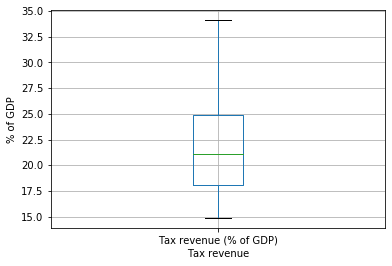

In [7]:
# Check if there is outlier in Tax revenue (% of GDP)
sandm_drop.boxplot(column = [
    'Tax revenue (% of GDP)' 
])
# displaying the plot
plt.xlabel('Tax revenue')
plt.ylabel('% of GDP')
plt.savefig('Outlier_Detection_2.png')
plt.show()

In [8]:
# filling NAs Tax revenue (% of GDP)
tax_mean = sandm_drop['Tax revenue (% of GDP)'].mean()
print(tax_mean)
tax_median = sandm_drop['Tax revenue (% of GDP)'].median()
print(tax_median)
sandm_drop['Tax revenue (% of GDP)']   = sandm_drop['Tax revenue (% of GDP)'].fillna(tax_median).round(6)
# slicing to show result
sandm_drop[['Country Name','GDP growth (annual %)','Tax revenue (% of GDP)']]

21.911353080125576
21.12405908233927


,Country Name,GDP growth (annual %),Tax revenue (% of GDP)
Country Code,,,
ALB,Albania,3.836620,18.879748
AND,Andorra,1.724022,21.124059
BIH,Bosnia & Herzegovina,3.163559,20.259337
HRV,Croatia,2.921363,21.610752
CZE,Czech Republic,4.352604,14.877358
EST,Estonia,4.856687,21.124059
FIN,Finland,3.043325,20.937129
GRC,Greece,1.505099,26.262142
HUN,Hungary,4.137064,23.216223


C:\Users\noych\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
C:\Users\noych\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\noych\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\noych\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  del sys.path[0]


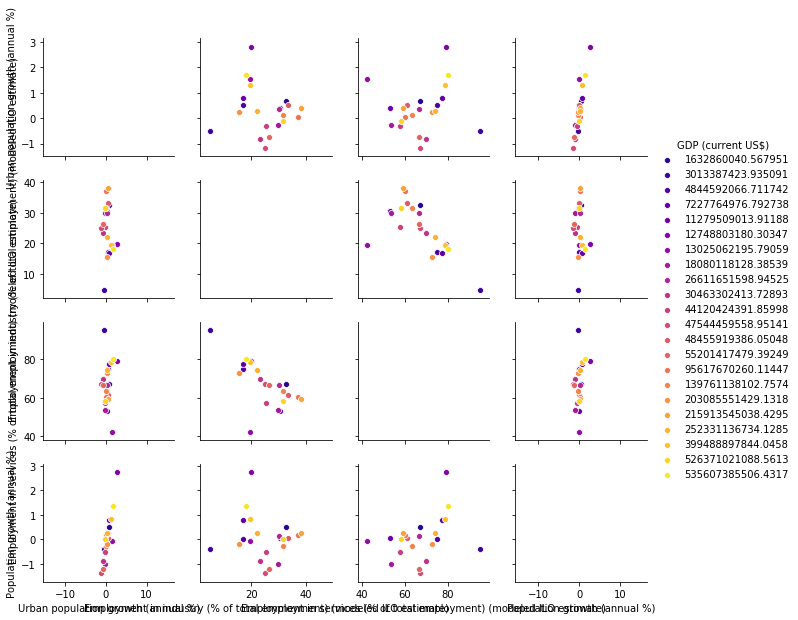

In [9]:
# importing packages
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # more data visualization

# and further adjusting hue
sns.pairplot(data = sandm_drop,
             x_vars = ['Urban population growth (annual %)', 'Employment in industry (% of total employment) (modeled ILO estimate)', 'Employment in services (% of total employment) (modeled ILO estimate)', 'Population growth (annual %)'],
             y_vars = ['Urban population growth (annual %)', 'Employment in industry (% of total employment) (modeled ILO estimate)', 'Employment in services (% of total employment) (modeled ILO estimate)', 'Population growth (annual %)'],
             hue = 'GDP (current US$)', palette = 'plasma')

# formatting options and display
plt.tight_layout()
plt.savefig('Data Pairplot.png')
plt.show()

In [ ]:
# a basic boxplot
slavic.boxplot(column = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)' 
])
# displaying the plot
plt.show()

nordic.boxplot(column = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)' 
])
# displaying the plot
plt.show()

medit.boxplot(column = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)' 
])
# displaying the plot

plt.show()

In [ ]:
sandm_drop.boxplot(column = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)' 
])
# displaying the plot
plt.xlabel('Employment')
plt.ylabel('% of total employment')
plt.xticks([1, 2, 3], ['Agriculture', 'Industry', 'Services'])
plt.savefig('Outlier_Detection_1.png')
plt.show()

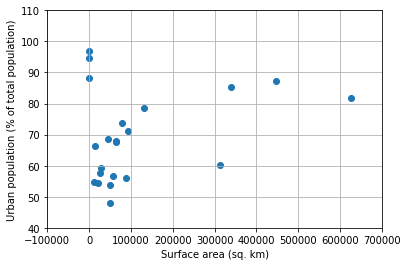

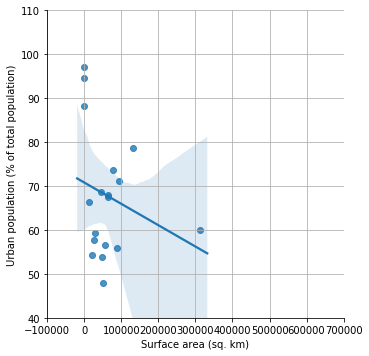

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
# specifying plot size
#fig, ax = plt.subplots(figsize=(10,10))


# scatter plot
plt.scatter(x = 'Surface area (sq. km)',
            y = 'Urban population (% of total population)',
#            alpha = 0.7,
#            cmap = 'bwr',
            data = sandm_drop) # region or subregion

# additional formatting options
plt.xlabel('Surface area (sq. km)')
plt.xlim((-100000,700000))
plt.ylabel('Urban population (% of total population)')
plt.ylim((40,110))
plt.grid(True)

plt.savefig('Scatter_Upop_vs_SurfaceArea.png')

# regression
sns.lmplot(data=nonordic,
         x="Surface area (sq. km)",
         y="Urban population (% of total population)")

x,y = nonordic[["Surface area (sq. km)","Urban population (% of total population)"]]

# additional formatting options
plt.xlabel('Surface area (sq. km)')
plt.xlim((-100000,700000))
plt.ylabel('Urban population (% of total population)')
plt.ylim((40,110))
plt.grid(True)


# displaying the plot
plt.savefig('Scatter_Upop_vs_SurfaceArea2.png')
plt.show()

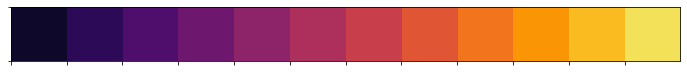

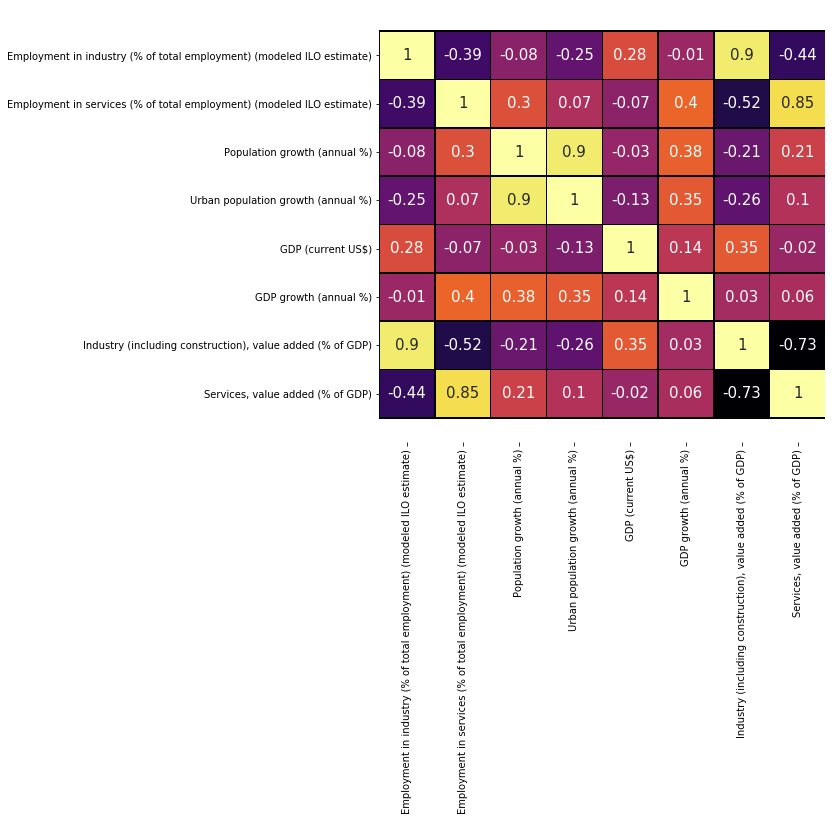

In [14]:
# generating a correlation matrix
df_corr = nonordic[Subinterest1].corr().round(2)

df_corr.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))

# specifying plot size
fig, ax = plt.subplots(figsize=(8,8))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            annot_kws={"size":15},
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Subinterest.png')
plt.show()

In [ ]:
# generating a correlation matrix
df_corr2 = sandm_drop[Subinterest1].corr().round(2)

df_corr2.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)

sns.heatmap(data       = df_corr2,
            cmap       = 'inferno',
            square     = True,
            annot      = False,
            linecolor  = 'black',
            linewidths = 0.5)


# saving the figure and displaying the plot

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

#plt.savefig('First Correlation Heatmap.png')
plt.show()

In [ ]:
# generating a correlation matrix
df_corr2 = micro[Interest].corr().round(2)

df_corr2.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr2,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Nordic Economy Heatmap.png')
plt.show()

In [ ]:
# generating a correlation matrix
df_corr3 = medit[Interest].corr().round(2)

df_corr3.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr3,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Nordic Population Heatmap.png')
plt.show()

In [ ]:
# generating a correlation matrix
df_corr4 = slavic[Interest].corr().round(2)

df_corr4.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr4,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Nordic Population Heatmap.png')
plt.show()

In [ ]:
# filling NAs Adolescent fertility rate (births per 1,000 women ages 15-19)
afr = 3.000 # Projections from research for all 3 countries are about 3.0
sandm_drop['Adolescent fertility rate (births per 1,000 women ages 15-19)']   = sandm_drop['Adolescent fertility rate (births per 1,000 women ages 15-19)'].fillna(afr).round(3)
# slicing to show result
sandm_drop[['Country Name','Adolescent fertility rate (births per 1,000 women ages 15-19)']]

In [ ]:
# filling NAs Age dependency ratio (% of working-age population)
adro_mean = sandm_drop['Age dependency ratio, old (% of working-age population)'].mean()
#print(adro_mean)
# Andorra is an outlier; Actual data is 18.2%, others are closer to the mean of the dataset
sandm_drop['Age dependency ratio, old (% of working-age population)']   = sandm_drop['Age dependency ratio, old (% of working-age population)'].fillna(adro_mean).round(6)
# slicing to show result
sandm_drop[['Country Name','Age dependency ratio, old (% of working-age population)']]

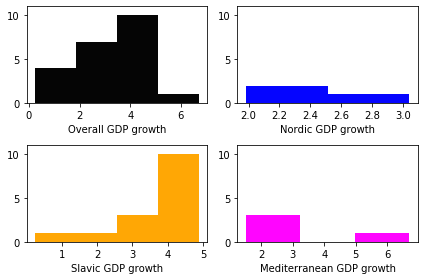

In [26]:
# Histogram with subplot results

import numpy as np

# GDP growth (annual %) by region and sub-region
plt.subplot(2, 2, 1) # top-left plot
plt.hist(sandm_drop['GDP growth (annual %)'],
         bins = 'fd',
         color='black',
         alpha = 0.98)

plt.xlabel('Overall GDP growth')
plt.ylim((0,11))

# GDP growth (annual %) nordic
plt.subplot(2, 2, 2) # top-right plot
plt.hist(nordic['GDP growth (annual %)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)

plt.xlabel('Nordic GDP growth')
plt.ylim((0,11))

# GDP growth (annual %) slavic
plt.subplot(2, 2, 3) # bottom-left plot
plt.hist(slavic['GDP growth (annual %)'],
         bins = 'fd',
         color='orange',
         alpha = 0.98)

plt.xlabel('Slavic GDP growth')
plt.ylim((0,11))

# GDP growth (annual %) mediterranean
plt.subplot(2, 2, 4) # bottom-right plot
plt.hist(medit['GDP growth (annual %)'],
         bins = 'fd',
         color='magenta',
         alpha = 0.98)

plt.xlabel('Mediterranean GDP growth')
plt.xlim((0,11))
plt.ylim((0,11))

# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
# saving the results to the working directory with savefig()
plt.savefig('Histograms GDP growth.png')
plt.show()


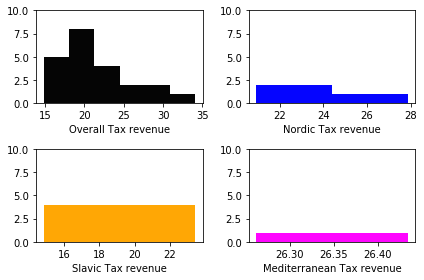

In [27]:
# Histogram with subplot results

import numpy as np

# GDP growth (annual %) by region and sub-region
plt.subplot(2, 2, 1) # top-left plot
plt.hist(sandm_drop['Tax revenue (% of GDP)'],
         bins = 'fd',
         color='black',
         alpha = 0.98)

plt.xlabel('Overall Tax revenue')
plt.ylim((0,10))


# GDP growth (annual %) nordic
plt.subplot(2, 2, 2) # top-right plot
plt.hist(nordic['Tax revenue (% of GDP)'],
         bins = 'fd',
         color='blue',
         alpha = 0.98)

plt.xlabel('Nordic Tax revenue')
plt.ylim((0,10))


# GDP growth (annual %) slavic
plt.subplot(2, 2, 3) # bottom-left plot
plt.hist(slavic['Tax revenue (% of GDP)'],
         bins = 'fd',
         color='orange',
         alpha = 0.98)

plt.xlabel('Slavic Tax revenue')
plt.ylim((0,10))


# GDP growth (annual %) mediterranean
plt.subplot(2, 2, 4) # bottom-right plot
plt.hist(medit['Tax revenue (% of GDP)'],
         bins = 'fd',
         color='magenta',
         alpha = 0.98)

plt.xlabel('Mediterranean Tax revenue')
plt.ylim((0,10))

# displaying the plot
plt.tight_layout() # adjust so that axis labels will show
# saving the results to the working directory with savefig()
plt.savefig('Histograms Tax revenue.png')
plt.show()


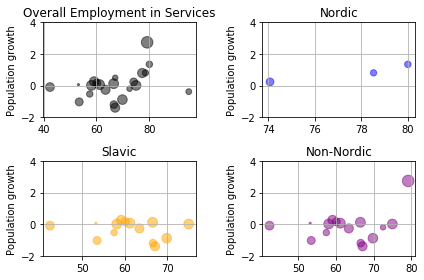

In [29]:
# Adding subplots
plt.subplot(2, 2, 1)

plt.scatter(x = 'Employment in services (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(sandm_drop['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'black',
            data = sandm_drop)


plt.title('Overall Employment in Services')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 2)

plt.scatter(x = 'Employment in services (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(nordic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'blue',
            data = nordic)


plt.title('Nordic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 3)

plt.scatter(x = 'Employment in services (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(slavic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'orange',
            data = slavic)


plt.title('Slavic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 4)

plt.scatter(x = 'Employment in services (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(nonordic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'purple',
            data = nonordic)


plt.title('Non-Nordic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

plt.tight_layout()
plt.savefig('Employment Services Scatterplots.png')
plt.show()


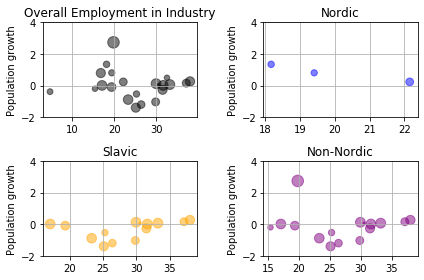

In [30]:
# Adding subplots
plt.subplot(2, 2, 1)

plt.scatter(x = 'Employment in industry (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(sandm_drop['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'black',
            data = sandm_drop)


plt.title('Overall Employment in Industry')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 2)

plt.scatter(x = 'Employment in industry (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(nordic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'blue',
            data = nordic)


plt.title('Nordic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 3)

plt.scatter(x = 'Employment in industry (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(slavic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'orange',
            data = slavic)


plt.title('Slavic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

#plt.show()

########################



plt.subplot(2, 2, 4)

plt.scatter(x = 'Employment in industry (% of total employment) (modeled ILO estimate)',
            y = 'Population growth (annual %)',
            s = np.array(nonordic['GDP growth (annual %)']*20),
            alpha = 0.5,
            color = 'purple',
            data = nonordic)


plt.title('Non-Nordic')
plt.ylabel('Population growth')
plt.ylim((-2,4))
plt.grid(True)

plt.tight_layout()
plt.savefig('Employment Industry Scatterplots.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
# scatter plot
color_dict = {
    'FIN':'red',
    'NOR':'red',
    'SWE':'red',
    'AND':'blue',
    'GRC':'blue',
    'MLT':'blue',
    'SMR':'blue',
    'ALB':'yellow',
    'BIH':'yellow',
    'HRV':'yellow',
    'CZE':'yellow',
    'EST':'yellow',
    'HUN':'green',
    'XKX':'black',
    'LVA':'yellow',
    'LTU':'yellow',
    'MKD':'yellow',
    'MNE':'yellow',
    'POL':'yellow',
    'SRB':'yellow',
    'SVK':'yellow',
    'SVN':'yellow'
}
col = [color for color in color_dict.values()]

plt.scatter(x = 'Tax revenue (% of GDP)',
            y = 'GDP growth (annual %)',
            s = np.array(sandm_drop['Population, total']/10000),
            c = col,
            alpha = 0.8,
#            cmap = 'bwr',
            data = sandm_drop) # region or subregion

# Previous customizations
plt.xscale('log') 
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('GDP growth (annual %)')
plt.title('Tax vs GDP growth')
plt.xticks([10, 20, 30],['10%', '20%', '30%'])

# Additional customizations
#plt.text(1550, 71, 'India')
#plt.text(5700, 80, 'China')

# Add grid() call
plt.grid(True)

# Show the plot
plt.show()

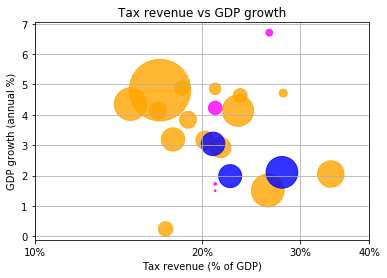

In [15]:
color_dict = {
    'ALB':'orange',
    'AND':'magenta',
    'BIH':'orange',
    'HRV':'orange',
    'CZE':'orange',
    'EST':'orange',
    'FIN':'blue',
    'GRC':'orange',
    'HUN':'orange',
    'XKX':'magenta',
    'LVA':'orange',
    'LTU':'orange',
    'MKD':'orange',
    'MLT':'magenta',
    'MNE':'orange',
    'NOR':'blue',
    'POL':'orange',
    'SMR':'magenta',
    'SRB':'orange',
    'SVK':'orange',
    'SVN':'orange',
    'SWE':'blue'
}
col = [color for color in color_dict.values()]

plt.scatter(x = 'Tax revenue (% of GDP)',
            y = 'GDP growth (annual %)',
            s = np.array(sandm_drop['Population, total']/10000),
            c = col,
            alpha = 0.8,
#            cmap = 'bwr',
            data = sandm_drop) # region or subregion

# Previous customizations
plt.xscale('log') 
plt.xlabel('Tax revenue (% of GDP)')
plt.ylabel('GDP growth (annual %)')
plt.title('Tax revenue vs GDP growth')
plt.xticks([10, 20, 30, 40],['10%', '20%', '30%', '40%'])

# Additional customizations
#plt.text(17.203028, 0.5, 'Macedonia')
#plt.text(26.433863, 6.2, 'Malta')

# Add grid() call
plt.grid(True)

plt.savefig('Tax_vs_GDP_vs_PopG.png')

# Show the plot
plt.show()

In [ ]:
# box plot showing the avergae current GDP for all countries with outliers 

sandm_drop.boxplot(column = ['GDP (current US$)'])

# displaying the plot
#plt.xlabel('Employment')
#plt.ylabel('% of total employment')
plt.xticks([1], ['GDP'])
plt.savefig('Outlier_Detection_gdp.png')
plt.show()

In [ ]:
# box plot of urban population growth % for all all countries in our data set 

sandm_drop.boxplot(column = ['Urban population growth (annual %)'])

# displaying the plot
#plt.xlabel('Employment')
#plt.ylabel('% of total employment')
plt.xticks([1], ['Urban Population Growth'])
plt.savefig('Outlier_Detection_Urban_pop_growth.png')
plt.show()

In [ ]:
# generating a correlation matrix heatmap for the interest variables on the nordic countries 

df_corr = nordic[Interest].corr().round(2)

df_corr.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

In [ ]:
# correlation matrix heatmap for all countries (unsegmented) 

df_corr1 = sandm_drop[Economy].corr().round(2)

df_corr1.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr1,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

In [ ]:
# generating a correlation matrix heatmap for the interest variables on the micro countries 

df_corr2 = micro[Interest].corr().round(2)


df_corr2.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr2,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

In [ ]:
# generating a correlation matrix heatmap for the interest variables on the mediterranean countries 

df_corr3 = medit[Interest].corr().round(2)

df_corr3.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr3,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()

In [ ]:
# generating a correlation matrix heatmap for the interest variables on the slavic countries

df_corr4 = slavic[Interest].corr().round(2)

df_corr4.dropna(axis = 1, thresh = 1).corr().dropna(thresh = 1).dropna(axis = 1, thresh = 1)


# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(df_corr4,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

plt.show()